In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn.gaussian_process
import scipy.interpolate
import csv

In [2]:
time_limit=24*7
max_mean_intensity=0.5
min_mean_intensity=0.25

amplitude = (max_mean_intensity - min_mean_intensity) / 2 # how far the wave oscillates above and below the offset
offset = min_mean_intensity + amplitude # the vertical shift or center of the wave
period = time_limit / 2 # 2 peaks per time limit
domain = np.linspace(0, time_limit, time_limit).reshape(-1, 1)
seasonal_mean_intensities = amplitude * np.sin(2 * np.pi * domain / period) + offset

length_scale = math.ceil(time_limit / 10)
kernel = sklearn.gaussian_process.kernels.RBF(length_scale=length_scale)
gp = sklearn.gaussian_process.GaussianProcessRegressor(kernel=kernel)
random_state = np.random.RandomState()

with open("intensity_function_ranges.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Domain"] + domain.flatten().tolist())
    for i in range(10):   
        while True:
            # generate samples from Gaussian Process prior
            sampled_function = gp.sample_y(domain, n_samples=1, random_state=random_state).flatten()
            # adjust by seasonal mean intensities
            sampled_function += seasonal_mean_intensities.flatten()
            if np.all(sampled_function >= 0) and np.all(sampled_function <= 2): # ensure reasonable values
                writer.writerow([f"Function_{i+1}"] + sampled_function.tolist())
                break

In [3]:
intensity_function_ranges = []
intensity_functions = []
max_intensities = []
with open("v2\\intensity_function_ranges_1.csv", "r") as file:
    reader = csv.reader(file)
    header = next(reader)  # Skip the header
    domain = np.array(header[1:], dtype=float)
    
    # Read the rows (skip the first column which contains labels like 'Function_1')
    for row in reader:
        intensity_function_range = np.array(row[1:], dtype=float)
        max_intensity = np.max(intensity_function_range)
        intensity_function = scipy.interpolate.CubicSpline(domain, intensity_function_range)

        intensity_function_ranges.append(intensity_function_range)
        intensity_functions.append(intensity_function)
        max_intensities.append(max_intensity)


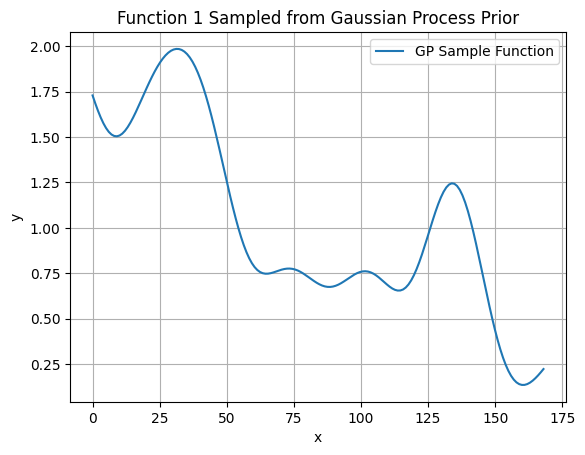

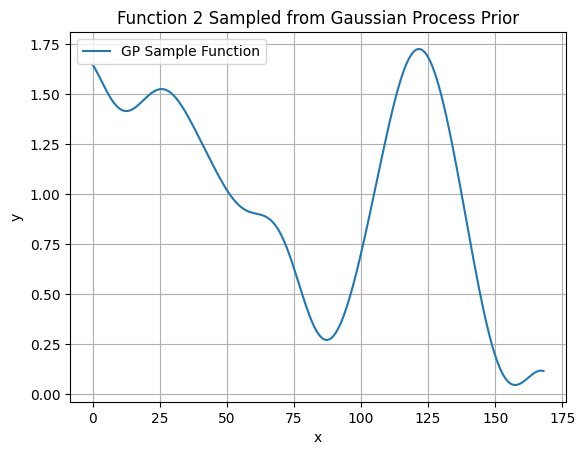

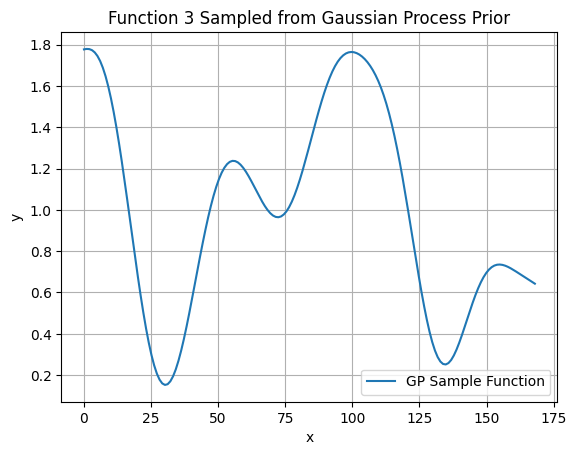

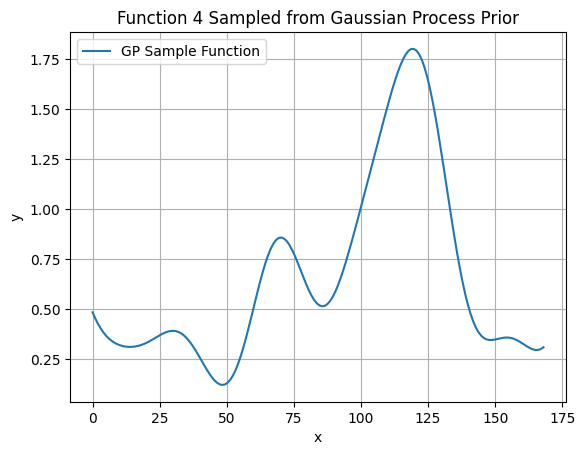

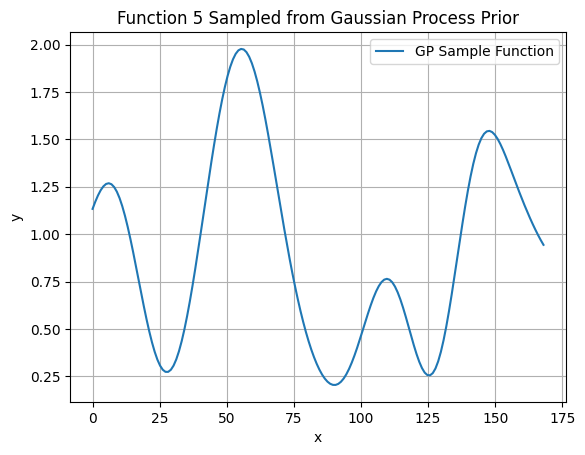

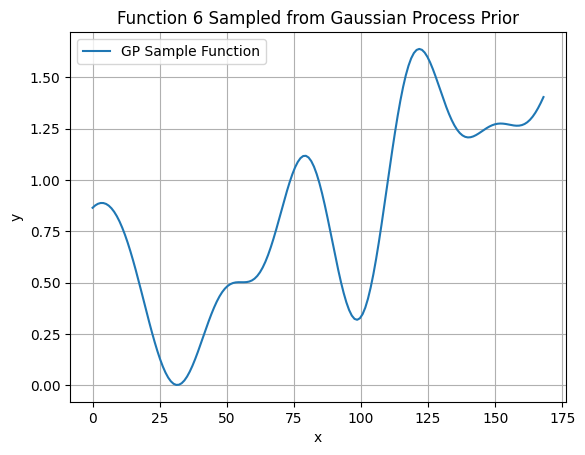

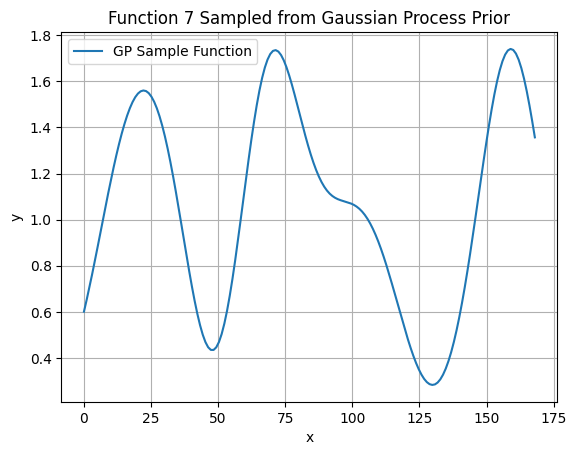

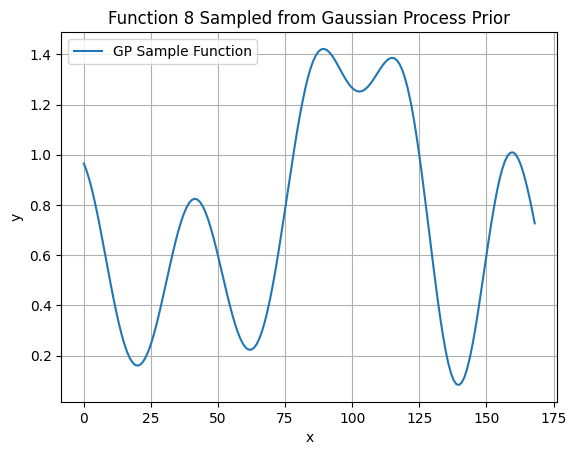

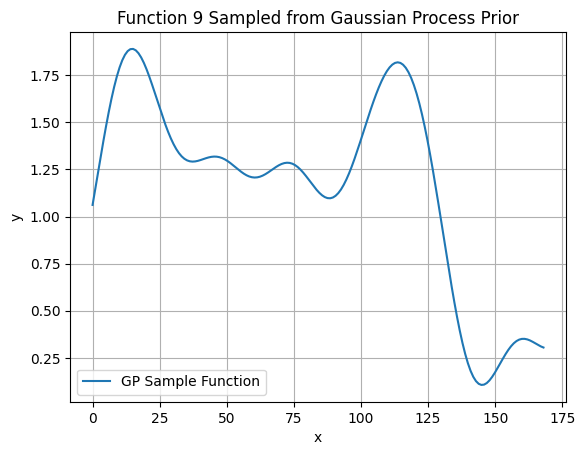

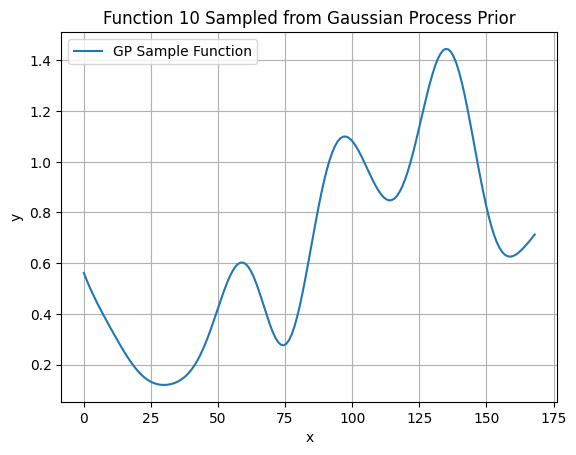

In [ ]:
# i = np.random.randint(0, 10)
for i in range(10):
    plt.plot(domain, intensity_functions[i](domain), label="GP Sample Function")
    plt.title(f"Function {i + 1} Sampled from Gaussian Process Prior")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()